### 머신러닝
- 데이터를 기반으로 학습
- 과거 컴퓨터로 데이터 입력, 특징을 학습 패턴을 찾는 패턴이식

#### 식에 필요한 요소
- 무언가(x)로 무엇(y)를 예측하고 싶다.

    $$ f(x) = y $$

        - x : 독립변수(입력변수), 데이터 문제
        - y : 종속변수(출력변수), 정답
        - f : 머신러닝 모형(모델)

- 우리는 이때까지 f를 직접코딩했음, x값들 입력하면 y가 나오도록 개발
- 머신러닝/딥러닝 x, y를 다 입력해서 훈련을 시켜 함수f를 컴퓨터가 만들도록 하는 것

#### 데이터셋 분리
- 훈련을 시켜서 독립변수에 대한 종속변수가 도출되는 모델 만들 수 있음
- 100% 훈련에 사용하면 검증을 할 데이터 없음
- Training데이터으로 훈련 후 Test데이터로 실험, 또는  Train데이터로 훈련, Valid데이터 검증 후, Test데이터 실험

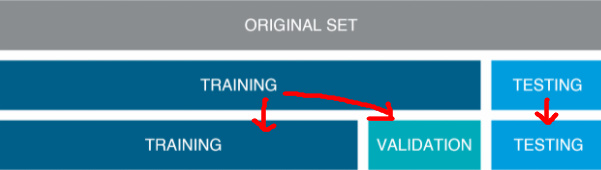

- 100%에서 Train:Test 나눌때 7:3 또는 8:2 로 비율을 나눔

#### 사이킷런으로 타이타닉 생존자 예측
- 선형회귀 : 선형회귀에 대한 정의는 결론을 본 뒤 설명

In [7]:
!pip install tqdm

  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.66.5-py3-none-any.whl (78 kB)



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### 사이킷런으로 타이타닉 생존자 예측
- 선형회귀 : 선형회귀에 대한 정의는 결론을 본 뒤 설명
- 사이킷런 설치
```python
!pip install scikit-learn
```

In [10]:
!pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.4/11.0 MB 8.5 MB/s eta 0:00:02
   --- ------------------------------------ 0.8/11.0 MB 8.9 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/11.0 MB 9.1 MB/s eta 0:00:02
   ------ --------------------------------- 1.7/11.0 MB 8.8 MB/s eta 0:00:02
   -------- ------------------------------- 2.2/11.0 MB 10.0 MB/s eta 0:00:01
   --------- ------------------------------ 2.5/11.0 MB 9.5 MB/s eta 0:00:01
   ---------- ----------------------------- 2.9/11.0 MB 9.3 MB/s eta 0:00:01
   ------------ --------------------------- 3.5/11.0 MB 10.0 MB/s eta 0:00:01
   -------------- ------------------------- 4.0/11.0 MB 10.2 MB/s eta 0:00:01
   ------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
# 분석, 시각화 라이브러리 사용
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams, rc, font_manager
import warnings
import seaborn as sns
import time
from tqdm import tqdm # 반복 진행 프로그레스바 모듈

In [14]:
warnings.simplefilter('ignore') # 경고메시지 출력숨김

## 맷플롯립 설정
plt.rcParams['font.size'] = 12 # 글자크기
plt.rcParams['figure.figsize'] = (12, 6) # (W, H)
plt.rcParams['axes.grid'] = True # 차트 가로세로줄 표시

## 시본 설정
sns.set_theme(style='darkgrid')

- https://github.com/datasciencedojo/datasets/blob/master/titanic.csv 에서 통합 데이터 다운로드

In [15]:
## 사이킷런 임포트
from sklearn import preprocessing

##### 데이터로드

In [17]:
df_train = pd.read_csv('./data/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 데이터 컬럼 정의
    1. PassengerId : 탑승자 데이터 일련번호
    2. Survived : 생존여부 0사망 1생존
    3. Pclass : 티켓의 선실 등급 1등석실, 2등석실, 3등석실
    4. Name : 탑승자 명
    5. Sex : 성별 male남성, female여성
    6. Age : 나이
    7. SibSp : Sibling(형제), Spouse(배우자) 동반 형제와 배우자수
    8. Parch, Parent, Child 동반한 부모 또는 자녀 인원수
    9. Ticket : 티켓번호
    10. Fare : 티켓요금
    11. Cabin : 선실번호
    12. Embarked : 탑승 항구코드 C.herbourg, Q.ueenstown, S.outhhampton



In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- 데이터
    - 총891개, 12개 컬럼, 2개의 float64, 5개 object(=string), 5개 int64
    
- 결측지(Null값)
    - Age 177개
    - Cabin 687개
    - Embarked 2개

##### 데이터 전처리

- Age 결측치 - 나이의 빈값은 평균치 입력
- Cabin의 결측치 - 2등석, 3등석 결측치 분포. 재검토
- Embarked의 결측치 - 탑승한구가 세군대, 그중에 가장 사람들이 많이 탄곳에서 탔을 거다!


In [23]:
# Age의 결측치
## 나이의 평균은 29.6923834 => 30.0
# round(df_train['Age'].mean())
round.df_train['Age'].fillna(round(df_train['Age'].mean()),inplace=True)

AttributeError: 'builtin_function_or_method' object has no attribute 'df_train'

In [27]:
## Embarked
## value_counts() 결과는 max부터 내림차순으로 나오기때문에
# df_train['Embarked'].value_counts().max()
# df_train['Embarked'].value_counts().index[0] # S
df_train['Embarked'].fillna(df_train['Embarked'].value_counts().index[0], inplace=True)

In [ ]:
## 해당 인덱스 값만 추출
df_train[df_train.index in(61, 829)]

In [31]:
# 
df_train.drop(['Cabin'], axis=1, inplace=True)

KeyError: "['Cabin'] not found in axis"